# Principal Component Analysis in scikit-learn - Lab

## Introduction

Now that you've seen a brief introduction to PCA, it's time to use scikit-learn to run PCA on your own. 

## Objectives

In this lab you will: 

- Implement PCA using the scikit-learn library 
- Determine the optimal number of n components when performing PCA by observing the explained variance 
- Plot the decision boundary of classification experiments to visually inspect their performance 

## Iris dataset

To practice PCA, you'll take a look at the iris dataset. Run the cell below to load it. 

In [20]:
from sklearn import datasets
import pandas as pd
 
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Before performing PCA and visualizing the principal components, it's helpful to get a little more context regarding the data that you'll be working with. Run the cell below in order to visualize the pairwise feature plots. With this, notice how the target labels are easily separable by any one of the given features.

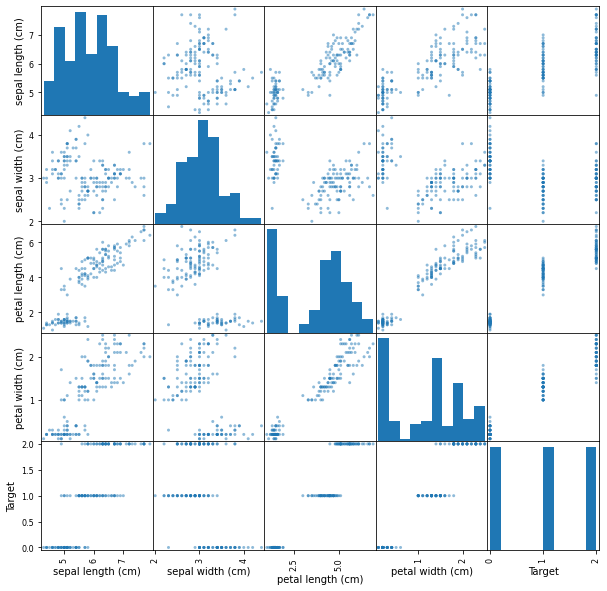

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df, figsize=(10,10));

- Assign all columns in the following `features` list to `X` 
- Assign the `'Target'` column to `y` 

In [22]:
# Create features and target datasets
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df[features]      # feature matrix
y = df['Target']      # target vector

Standardize all the columns in `X` using `StandardScaler`. 

In [23]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the features
X = scaler.fit_transform(df[features])

# Preview X
pd.DataFrame(data=X, columns=features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## PCA Projection to 2-D Space

Now its time to perform PCA! Project the original data which is 4 dimensional into 2 dimensions. The new components are just the two main dimensions of variance present in the data.

- Initialize an instance of PCA from scikit-learn with two components
- Fit the data to the model
- Extract the first two principal components from the trained model 

In [24]:
# Import PCA
from sklearn.decomposition import PCA


# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA and transform the standardized data X
principalComponents = pca.fit_transform(X)

# principalComponents is now a 2-column array with PC1 and PC2
principalComponents[:5]   # optional preview


array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

To visualize the components, it will be useful to also look at the target associated with the particular observation. 
As such, append the target (flower type) to the principal components in a pandas dataframe.

In [25]:
# Create a DataFrame from the principal components
principalDf = pd.DataFrame(
    data=principalComponents, 
    columns=['PC1', 'PC2']
)

# Add the target column
principalDf['Target'] = y.values

# Preview the combined dataset
principalDf.head()

,PC1,PC2,Target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Great, you now have a set of two dimensions, reduced from four against our target variable, the flower type. 

## Visualize Principal Components 

Using the target data, we can visualize the principal components according to the class distribution. 
- Create a scatter plot from principal components while color coding the examples according to what flower type each example is classified as

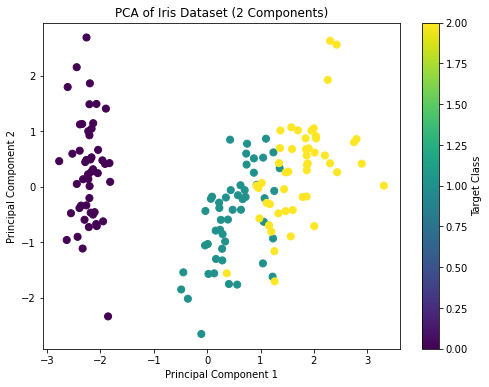

In [26]:
# Principal Components scatter plot
plt.figure(figsize=(8,6))

# Scatter plot with class-based colors
plt.scatter(
    principalDf['PC1'], 
    principalDf['PC2'], 
    c=principalDf['Target'], 
    cmap='viridis', 
    s=50
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (2 Components)')
plt.colorbar(label='Target Class')
plt.show()

## Explained Variance


You can see above that the three classes in the dataset are fairly well separable. As such, this compressed representation of the data is probably sufficient for the classification task at hand. Compare the variance in the overall dataset to what was captured from your two primary components.

In [27]:
# Calculate the variance explained by principal components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\nTotal Variance Explained:', sum(pca.explained_variance_ratio_))

Variance of each component: [0.72962445 0.22850762]

Total Variance Explained: 0.9581320720000164


As you should see, these first two principal components account for the vast majority of the overall variance in the dataset. This is indicative of the total information encapsulated in the compressed representation compared to the original encoding.

## Compare Performance of a Classifier with PCA

Since the principal components explain 95% of the variance in the data, it is interesting to consider how a classifier trained on the compressed version would compare to one trained on the original dataset.

- Run a `KNeighborsClassifier` to classify the Iris dataset 
- Use a train/test split of 80/20
- For the reproducibility of results, set `random_state=9` for the split
- Time the process for splitting, training and making predictions

In [28]:
# Classification - complete Iris dataset

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Start timing
start_time = time.time()

# Train/test split (80/20), reproducible with random_state=9
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9
)

# Initialize KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy_full = accuracy_score(y_test, y_pred)

# End timing
end_time = time.time()
elapsed = end_time - start_time

print(f"Accuracy (Full Dataset): {accuracy_full:.4f}")
print(f"Time taken: {elapsed:.4f} seconds")

Accuracy (Full Dataset): 1.0000
Time taken: 0.0133 seconds


Great, so you can see that we are able to classify the data with 100% accuracy in the given time. Remember the time taken may be different based on the load on your CPU and number of processes running on your machine. 

Now repeat the above process for the dataset made from principal components: 

- Run a `KNeighborsClassifier` to classify the Iris dataset with principal components
- Use a train/test split of 80/20
- For the reproducibility of results, set `random_state=9` for the split
- Time the process for splitting, training and making predictions

In [29]:
# Classification - reduced (PCA) Iris dataset

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Start timing
start_time = time.time()

# Train/test split using PCA components
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    principalComponents, y, test_size=0.2, random_state=9
)

# Initialize KNN
knn_pca = KNeighborsClassifier()

# Train model
knn_pca.fit(X_train_pca, y_train_pca)

# Predict
y_pred_pca = knn_pca.predict(X_test_pca)

# Compute accuracy
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

# End timing
end_time = time.time()
elapsed_pca = end_time - start_time

print(f"Accuracy (PCA Dataset): {accuracy_pca:.4f}")
print(f"Time taken: {elapsed_pca:.4f} seconds")

Accuracy (PCA Dataset): 0.9667
Time taken: 0.0134 seconds


Although some accuracy is lost in this representation of the data, we were able to use half of the number of features to train the model!

In more complex cases, PCA can even improve the accuracy of some machine learning tasks. In particular, PCA can be useful to reduce overfitting.

## Visualize the Learned Decision Boundary 

Run the cell below to visualize the decision boundary learned by the k-nearest neighbor classification model trained using the principal components of the data. 

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def decision_boundary(model, X_df, y_series):
    """
    Plot decision boundaries for a 2D dataset.
    
    model: trained classifier
    X_df: DataFrame with 2 columns (features)
    y_series: target labels (Series or array)
    """
    # Set boundary limits
    x_min, x_max = X_df.iloc[:, 0].min() - 0.5, X_df.iloc[:, 0].max() + 0.5
    y_min, y_max = X_df.iloc[:, 1].min() - 0.5, X_df.iloc[:, 1].max() + 0.5
    h = 0.01

    # Create meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contour
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.afmhot, alpha=0.6)
    
    # Scatter plot of actual points
    plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_series, cmap=plt.cm.Spectral, edgecolor='k', s=50)
    plt.xlabel(X_df.columns[0])
    plt.ylabel(X_df.columns[1])

C:\Users\maryb\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


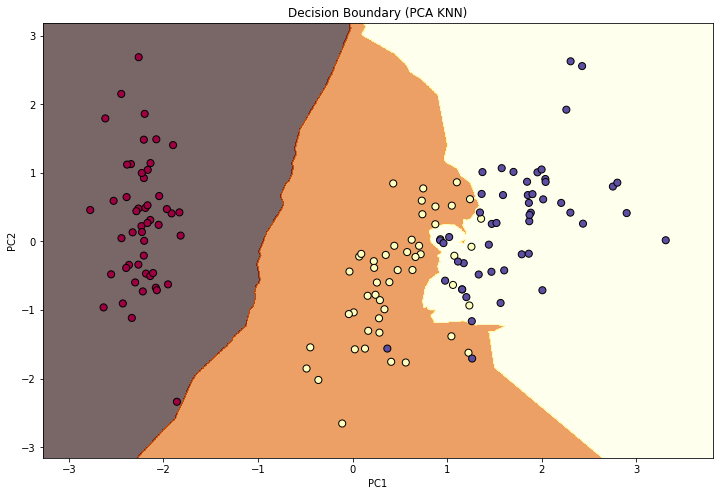

In [31]:
# Make sure your PCA DataFrame and target are ready
X_pca_df = principalDf[['PC1', 'PC2']]
y_pca = principalDf['Target']

# Train KNN on PCA components
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_pca_df, y_pca)

# Plot decision boundary
decision_boundary(model, X_pca_df, y_pca)
plt.title('Decision Boundary (PCA KNN)')
plt.show()

## Summary 

In this lab, you applied PCA to the popular Iris dataset. You looked at the performance of a simple classifier and the impact of PCA on the accuracy of the model and the time it took to run the model. From here, you'll continue to explore PCA at more fundamental levels.